# Exploratory Data Analysis on Used Cars Dataset

## Objective
The purpose of this project is to conduct a comprehensive Exploratory Data Analysis (EDA) on a real-world dataset of used car listings across various locations. The analysis aims to:
- Understand key factors influencing used car prices.
- Identify patterns in features such as mileage, engine power, fuel type, and ownership history.
- Assess data quality and readiness for potential predictive modeling tasks.

## Dataset Overview
The dataset contains various attributes related to car specifications, condition, and sale details:
- **Numerical Features**: Price, Mileage, Power, Engine, Kilometers Driven
- **Categorical Features**: Fuel Type, Transmission, Owner Type, Location, Year
- **Target Variable**: Price (current market value of the used car)

## Tools and Libraries
- **Language**: Python
- **Libraries**: pandas, numpy, matplotlib, seaborn, plotly, missingno

## Deliverables
- A clean and insightful Jupyter Notebook with complete EDA
- Visualizations and trends based on car data
- Key insights and recommendations for modeling
- Preparation of the dataset for machine learning tasks
- A Streamlit dashboard (to be linked in the GitHub repo)

---

Let's begin by loading the dataset and exploring its structure. 
xploring its structure. 📂


# Libraries Import

In [1]:
#importing all the required libraries 
import pandas as pd
import numpy as np
import os
import numpy as np
from numpy import random
from numpy import random
from numpy .linalg import inv
import os
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import skew , kurtosis
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import poisson , norm
import seaborn as sns
from scipy.stats import expon
from scipy.stats import t

# Data Overview

In [2]:
# Load the dataset and display the structure (rows, columns, data types).
df= pd.read_csv('used_cars_data.csv')

In [3]:
#Load the dataset and display the structure (rows, columns, data types).
df = pd.read_csv("used_cars_data.csv")
print(df.head(2))
print("\n",df.columns)
print("\n",df.dtypes)

   S.No.                              Name Location  Year  Kilometers_Driven  \
0      0            Maruti Wagon R LXI CNG   Mumbai  2010              72000   
1      1  Hyundai Creta 1.6 CRDi SX Option     Pune  2015              41000   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   

  New_Price  Price  
0       NaN   1.75  
1       NaN  12.50  

 Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

 S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage            

In [4]:
#Print the number of null values in the given dataset
df.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [5]:
#Identify and handle missing values across the dataset.

# Fill numeric columns with median
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.isna().sum()

C:\Users\Sahil Karande\AppData\Local\Temp\ipykernel_464\2416165727.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Sahil Karande\AppData\Local\Temp\ipykernel_464\2416165727.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [6]:
#Check for duplicate entries.
df.duplicated().sum()

0

In [7]:
# Extract numeric part before space and convert to float in one line per column

df['Mileage'] = pd.to_numeric(df['Mileage'].str.split().str[0], errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'].str.split().str[0], errors='coerce')
df['Power'] = pd.to_numeric(df['Power'].str.split().str[0], errors='coerce')

In [8]:
# Remove 'Lakh', convert to float, then multiply by 100000
df['New_Price'] = df['New_Price'].str.replace('Lakh', '').str.strip()
df['New_Price'] = pd.to_numeric(df['New_Price'], errors='coerce')
df['New_Price'] = df['New_Price'] * 100000

In [9]:
#Extract brand name from Name (first word)
df['Brand'] = df['Name'].str.split().str[0]

# Descriptive Analysis

In [10]:
#Generate summary statistics (mean, median, std. dev., etc.) for numeric features like
#Price, Mileage, Power, Engine, Kilometers_Driven.

numeric_cols = ['Price', 'Mileage', 'Power', 'Engine', 'Kilometers_Driven']

for col in numeric_cols:
    mean = df[col].mean()
    print(f"Mean of {col}: {mean}")

print(f"\n\n")
for col in numeric_cols:
    median = df[col].median()
    print(f"Median of {col}: {median}")

print(f"\n\n")
for col in numeric_cols:
    std = df[col].std()
    print(f"Standard Deviation of {col}: {std}")



Mean of Price: 8.826234661519372
Mean of Mileage: 18.14126568316559
Mean of Power: 112.51490524985962
Mean of Engine: 1613.912450020681
Mean of Kilometers_Driven: 58699.063146284294



Median of Price: 5.64
Median of Mileage: 18.16
Median of Power: 93.7
Median of Engine: 1462.0
Median of Kilometers_Driven: 53416.0



Standard Deviation of Price: 10.293313235392908
Standard Deviation of Mileage: 4.561606847364941
Standard Deviation of Power: 53.41088258085208
Standard Deviation of Engine: 594.3283593770011
Standard Deviation of Kilometers_Driven: 84427.72058265151


In [11]:
#Analyze the distribution of categorical features like Fuel_Type, Transmission,
#Owner_Type, and Location.
categorical_cols = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']

for col in categorical_cols:
    print(f"Distribution of {col}:")
    print(df[col].value_counts())
    print("\n")

Distribution of Fuel_Type:
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64


Distribution of Transmission:
Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64


Distribution of Owner_Type:
Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64


Distribution of Location:
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64




# Visual Explorations

## 3. Create histograms and box plots for numerical features, such as Price, Engine, and Mileage Histogram for Price Feature

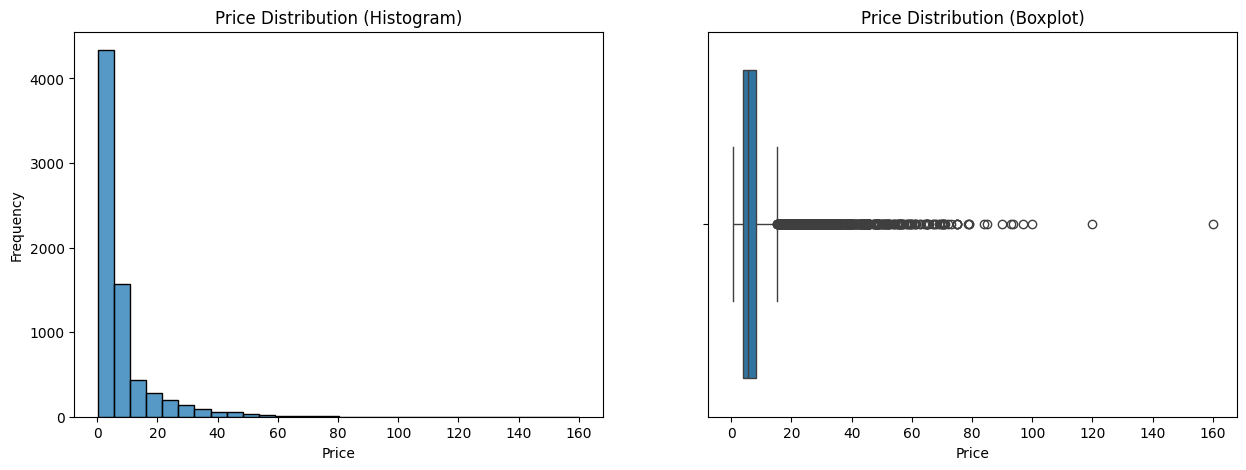

In [12]:
# Create the figure and axes
plt.figure(figsize=(15, 5))

# Plot the histogram
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
sns.histplot(df['Price'], bins=30)  # Adding kde for a smoother view

# Set title and labels for the histogram
plt.title('Price Distribution (Histogram)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot the boxplot
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
sns.boxplot(x=df['Price'])

plt.title('Price Distribution (Boxplot)')
plt.xlabel('Price')

plt.show()


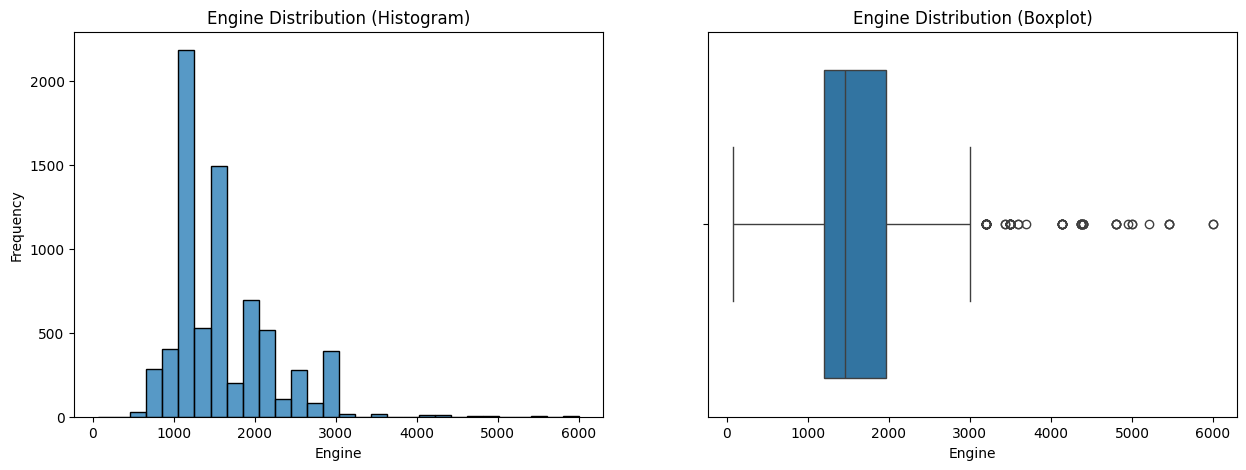

In [13]:
# Create the figure and axes
plt.figure(figsize=(15, 5))

# Plot the histogram
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
sns.histplot(df['Engine'], bins=30)  # Adding kde for a smoother view

# Set title and labels for the histogram
plt.title('Engine Distribution (Histogram)')
plt.xlabel('Engine')
plt.ylabel('Frequency')

# Plot the boxplot
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
sns.boxplot(x=df['Engine'])

plt.title('Engine Distribution (Boxplot)')
plt.xlabel('Engine')

plt.show()


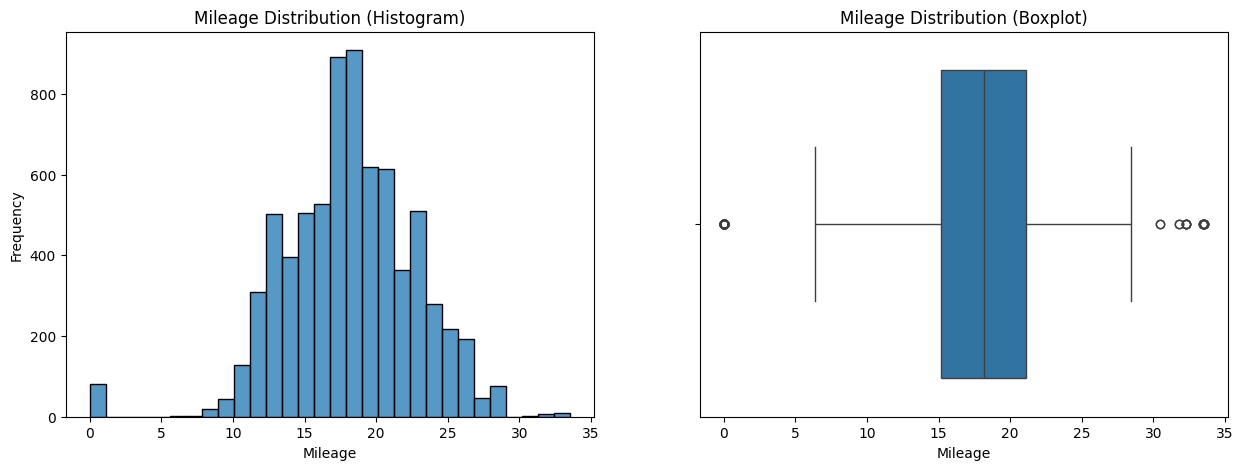

In [14]:
# Create the figure and axes
plt.figure(figsize=(15, 5))

# Plot the histogram
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
sns.histplot(df['Mileage'], bins=30)  # Adding kde for a smoother view

# Set title and labels for the histogram
plt.title('Mileage Distribution (Histogram)')
plt.xlabel('Mileage')
plt.ylabel('Frequency')

# Plot the boxplot
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
sns.boxplot(x=df['Mileage'])

plt.title('Mileage Distribution (Boxplot)')
plt.xlabel('Mileage')

plt.show()


## 4. Plot bar charts showing the frequency of different Fuel_Type, Transmission, and Owner_Type.

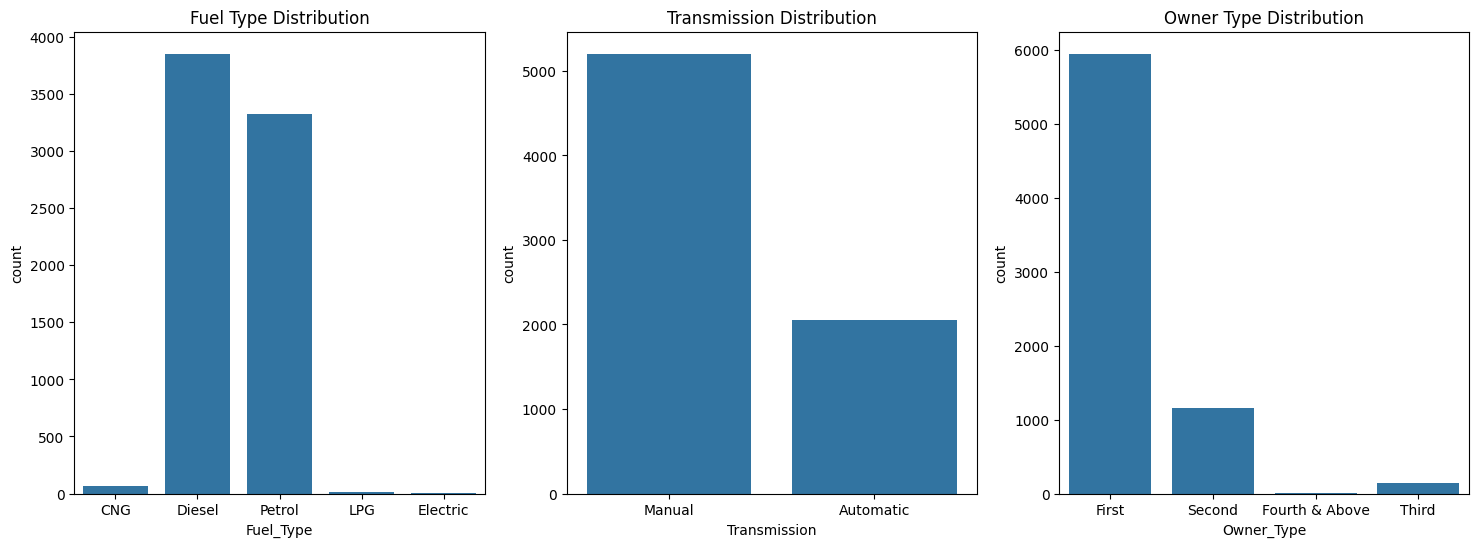

In [15]:
# Create a figure with 1 row and 3 columns for the countplots
plt.figure(figsize=(18, 6))

# Plot for Fuel_Type
plt.subplot(1, 3, 1)  # (rows, columns, panel number)
sns.countplot(x='Fuel_Type', data=df)
plt.title('Fuel Type Distribution')

# Plot for Transmission
plt.subplot(1, 3, 2)  # (rows, columns, panel number)
sns.countplot(x='Transmission', data=df)
plt.title('Transmission Distribution')

# Plot for Owner_Type
plt.subplot(1, 3, 3)  # (rows, columns, panel number)
sns.countplot(x='Owner_Type', data=df)
plt.title('Owner Type Distribution')

plt.show()


## 5. Visualize the trend of average car prices over Year of manufacture.

<Axes: xlabel='Year', ylabel='Price'>

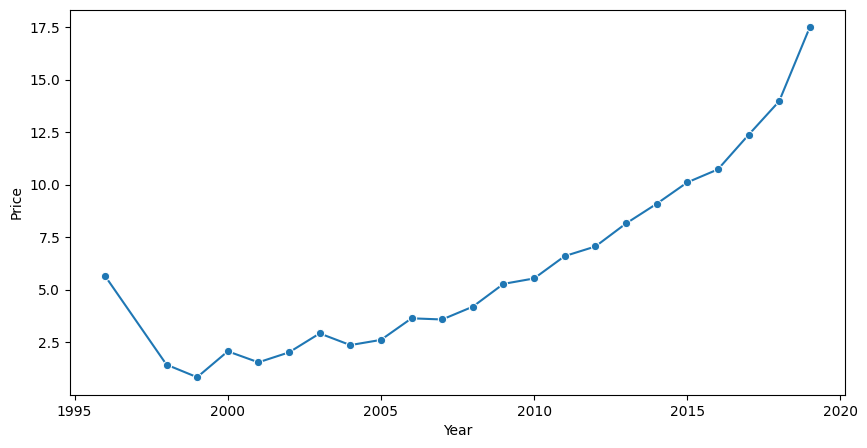

In [16]:
yearly_avg_price = df.groupby('Year')['Price'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_avg_price, x='Year', y='Price', marker='o')

## 6. Compare price distributions across different Locations and Fuel_Types.

Text(0.5, 1.0, 'Car Price Distribution by Location')

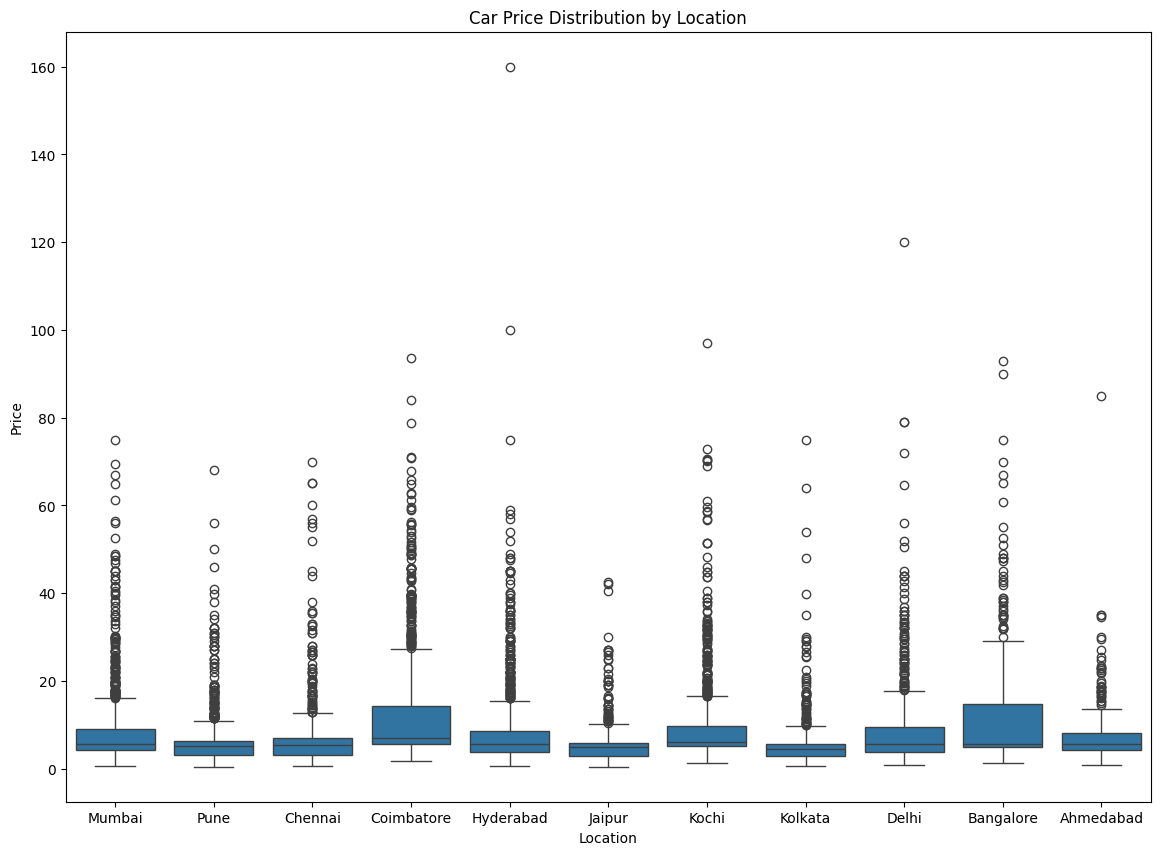

In [17]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='Location', y='Price', data=df)
plt.title('Car Price Distribution by Location')

# Correlation and Feature Relationships

## 8. Compute a correlation matrix for numerical columns and visualize it using a heatmap.

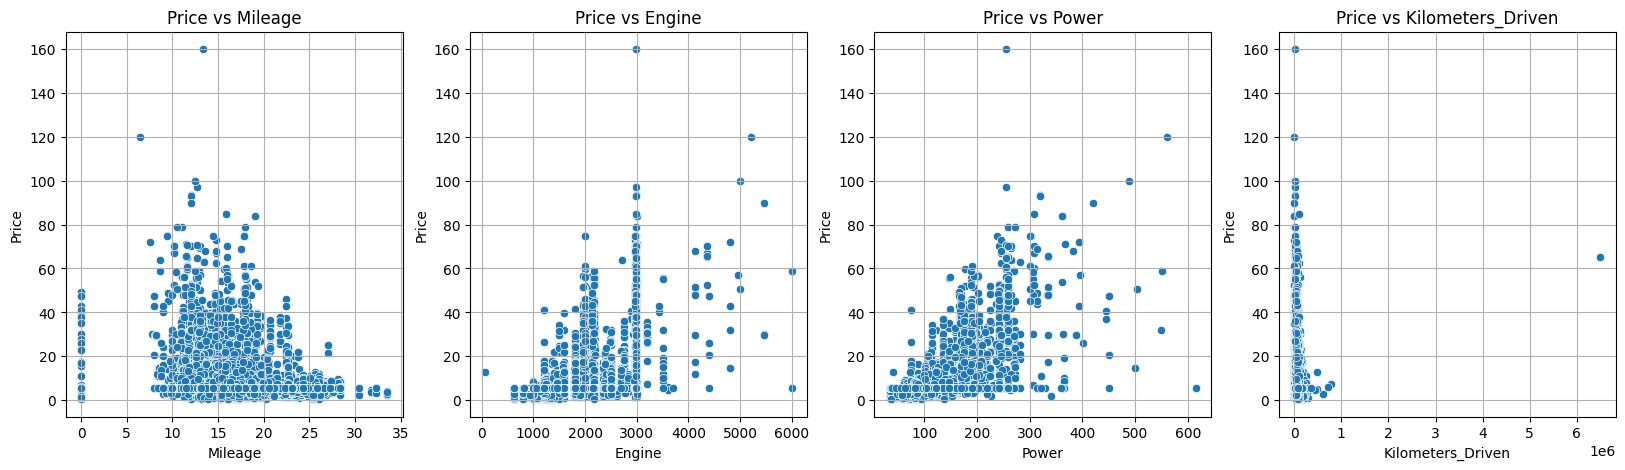

In [18]:
features = ['Mileage', 'Engine', 'Power', 'Kilometers_Driven']

# Create a figure with 1 row and 
plt.figure(figsize=(20, 5))

# Loop through each feature and create a scatter plot
for i, feature in enumerate(features, 1):
    plt.subplot(1, 4, i)  # (rows, columns, panel number)
    sns.scatterplot(x=df[feature], y=df['Price'])
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True)

plt.show()


## 9. Analyze multivariate interactions, such as how Transmission and Fuel_Type together affect Price.

<Axes: xlabel='Fuel_Type', ylabel='Price'>

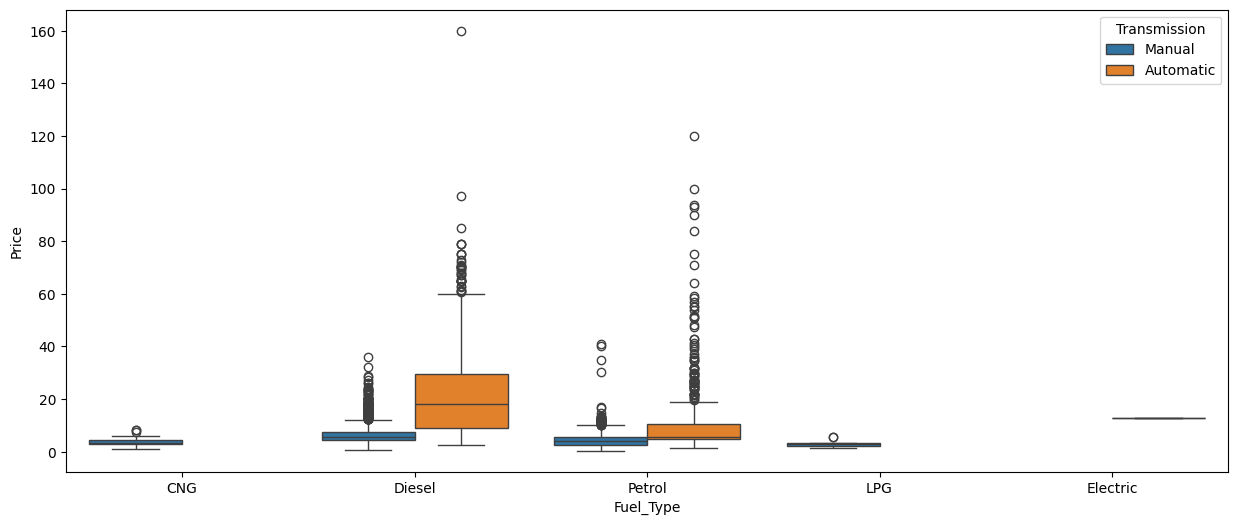

In [19]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Fuel_Type', y='Price', hue='Transmission', data=df)

# Outliers and Data Quality

## 10. Use boxplots to identify outliers in Price, Engine, and Power.

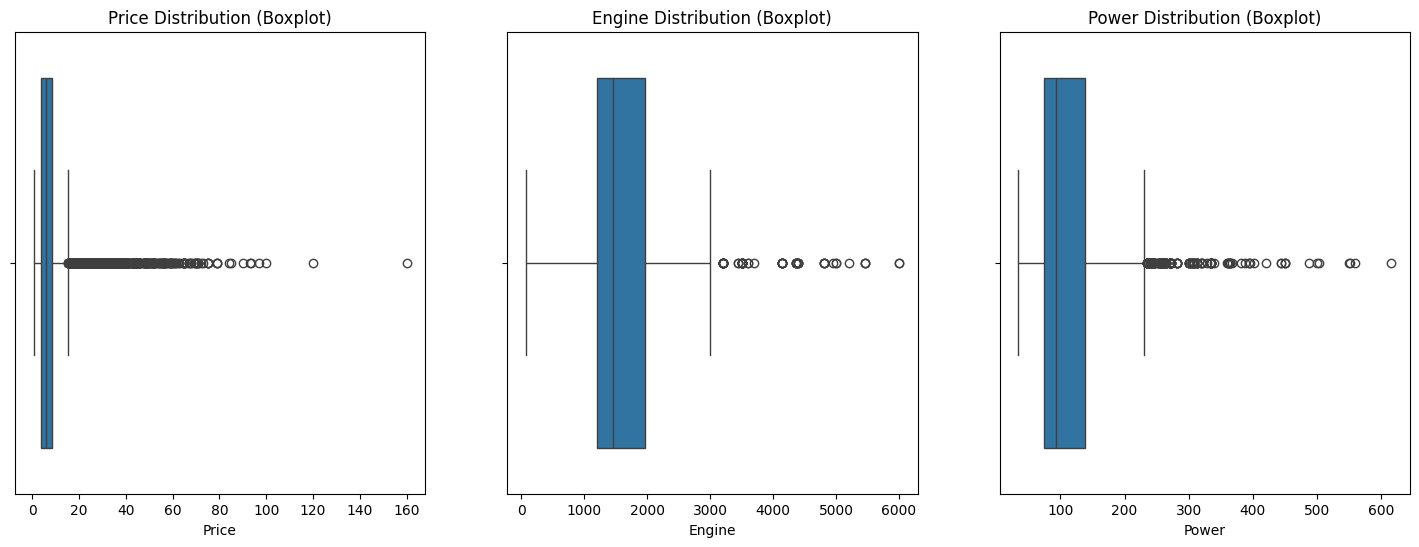

In [20]:
features = ['Price', 'Engine', 'Power']

# Create a figure with 1 row and 3 columns
plt.figure(figsize=(18, 6))

# Loop through each feature and create a boxplot
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)  # (rows, columns, panel number)
    sns.boxplot(x=df[feature])
    plt.title(f'{feature} Distribution (Boxplot)')
    plt.xlabel(feature)

plt.show()

## 13. Determine the most and least expensive car models and their characteristics..

In [21]:
max_price = df['Price'].max()
most_expensive = df[df['Price'] == max_price]
most_expensive

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
4079,4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993,255.0,5.0,NaN,160.0,Land


In [22]:
min_price = df['Price'].min()
least_expensive = df[df['Price'] == min_price]
least_expensive

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
1713,1713,Tata Nano Lx,Pune,2011,65000,Petrol,Manual,Second,26.0,624,35.0,4.0,3336000.0,0.44,Tata


## 14.Compare the average price of cars based on number of previous owners.


In [23]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [24]:
owner_avg_price = df.groupby('Owner_Type')['Price'].mean().reset_index()
print(owner_avg_price)


       Owner_Type     Price
0           First  9.219525
1  Fourth & Above  3.870000
2          Second  7.286849
3           Third  5.118102


<Axes: xlabel='Owner_Type', ylabel='Price'>

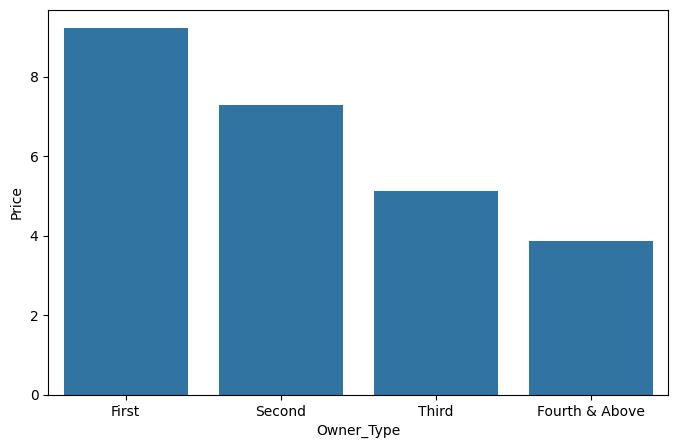

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Owner_Type', y='Price', data=owner_avg_price, order=['First', 'Second', 'Third', 'Fourth & Above'])


## 15. Evaluate how mileage efficiency correlates with car price and manufacturing year.

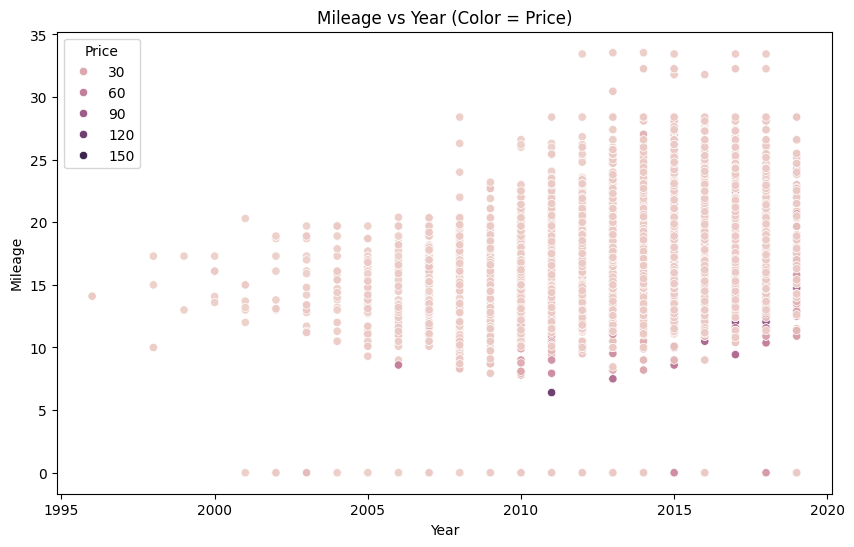

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Year', y='Mileage', hue='Price', data=df)
plt.title("Mileage vs Year (Color = Price)")
plt.show()

In [27]:
df.to_csv('used_cars_cleaned.csv', index=False)